In [2]:
#Import the necessary Python libraries

#!conda install pystan
#!conda install -c conda-forge fbprophet
#!conda install -c plotly plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fbprophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")

In [3]:
!conda install pystan
!conda install -c conda-forge fbprophet

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
#Import the dataset

global_confirmed_cases = pd.read_csv("covid19-data-from-john-hopkins-university/CONVENIENT_global_confirmed_cases.csv")

In [6]:
global_confirmed_cases

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,11/27/21,19.0,405.0,163.0,0.0,9.0,0.0,1521.0,517.0,7.0,...,39567.0,291.0,218.0,0.0,686.0,16067.0,0.0,2.0,20.0,0.0
676,11/28/21,28.0,418.0,172.0,0.0,5.0,0.0,888.0,409.0,7.0,...,36507.0,167.0,232.0,0.0,650.0,12936.0,0.0,6.0,5.0,115.0
677,11/29/21,42.0,195.0,192.0,0.0,11.0,0.0,1968.0,189.0,6.0,...,42144.0,156.0,234.0,0.0,600.0,13770.0,574.0,8.0,7.0,275.0
678,11/30/21,29.0,195.0,187.0,403.0,13.0,0.0,2332.0,398.0,4.0,...,39713.0,191.0,143.0,0.0,0.0,13972.0,0.0,9.0,19.0,399.0


In [4]:
#Check the dataset properties

print(global_confirmed_cases.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Columns: 281 entries, Country/Region to Zimbabwe
dtypes: float64(193), object(88)
memory usage: 1.5+ MB
None


In [5]:
print(global_confirmed_cases.describe())

       Afghanistan      Albania      Algeria     Andorra       Angola  \
count   679.000000   679.000000   679.000000  679.000000   679.000000   
mean    231.751105   294.805596   310.343152   25.664212    95.998527   
std     404.263216   324.847848   300.154928   42.858336   119.648594   
min      -2.000000     0.000000     0.000000    0.000000     0.000000   
25%      23.000000    18.000000   125.500000    0.000000     9.000000   
50%      72.000000   141.000000   203.000000    8.000000    59.000000   
75%     223.500000   541.000000   402.000000   38.000000   136.500000   
max    3243.000000  1239.000000  1927.000000  403.000000  1493.000000   

       Antigua and Barbuda     Argentina      Armenia       Austria  \
count           679.000000    679.000000   679.000000    679.000000   
mean              6.098675   7853.650957   499.293078   1723.655376   
std              21.938584   8131.833207   545.812005   2600.033322   
min              -1.000000      0.000000     0.000000     

In [7]:
#Select Russia's confirmed cases data only for prediction

RUS_confirmed_cases = pd.DataFrame(global_confirmed_cases[["Country/Region","Russia"]])


In [8]:
RUS_confirmed_cases

,Country/Region,Russia
0,Province/State,NaN
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
675,11/27/21,33119.0
676,11/28/21,32786.0
677,11/29/21,33170.0
678,11/30/21,31990.0


In [7]:
print(RUS_confirmed_cases.iloc[0])

Country/Region    Province/State
Russia                       NaN
Name: 0, dtype: object


In [8]:
#Change the header of Russian confirmed cases data

RUS_confirmed_cases.columns = ['ds','y']
RUS_confirmed_cases

,ds,y
0,Province/State,NaN
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
675,11/27/21,33119.0
676,11/28/21,32786.0
677,11/29/21,33170.0
678,11/30/21,31990.0


In [9]:
#Remove the first row from Russian confirmed cases data

RUS_confirmed_cases = RUS_confirmed_cases[1:]
RUS_confirmed_cases

,ds,y
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
5,1/27/20,0.0
...,...,...
675,11/27/21,33119.0
676,11/28/21,32786.0
677,11/29/21,33170.0
678,11/30/21,31990.0


In [10]:
#Check for missing value(s) in the Russian confirmed cases data

RUS_confirmed_cases.isnull().sum()

ds    0
y     0
dtype: int64

In [11]:
#Compute and display summary statistics of the Russian confirmed cases data

RUS_confirmed_cases.describe()

,y
count,679.000000
mean,13992.394698
std,10128.890520
min,0.000000
25%,6413.000000
50%,10376.000000
75%,21689.000000
max,40210.000000


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


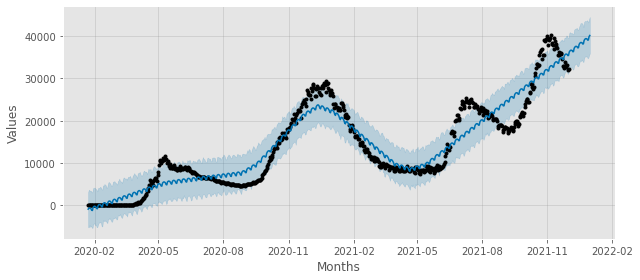

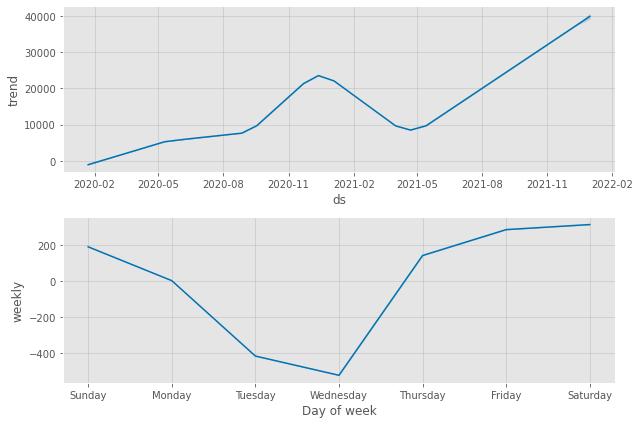

In [12]:
#Create FBProphet Model and visualize the model output for Russian confirmed cases data

class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Months",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(RUS_confirmed_cases)])

model1 = Fbprophet()
model1.fit(RUS_confirmed_cases)
model1.forecast(30,"D")
model1.plot()

In [13]:
#Evaluate performance of the FBProphet model on Russian COVID-19 confirmed cases prediction

model1.R2()

0.894712824286006

In [14]:
global_deaths = pd.read_csv("covid19-data-from-john-hopkins-university/CONVENIENT_global_deaths.csv")

In [15]:
global_deaths

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,11/27/21,1.0,8.0,6.0,0.0,0.0,0.0,12.0,26.0,0.0,...,131.0,1.0,3.0,0.0,7.0,148.0,0.0,2.0,0.0,0.0
676,11/28/21,0.0,4.0,6.0,0.0,0.0,0.0,12.0,29.0,0.0,...,51.0,4.0,2.0,0.0,7.0,190.0,0.0,1.0,0.0,1.0
677,11/29/21,0.0,3.0,6.0,0.0,0.0,0.0,25.0,21.0,0.0,...,35.0,1.0,2.0,0.0,6.0,173.0,7.0,3.0,0.0,1.0
678,11/30/21,0.0,4.0,7.0,0.0,0.0,0.0,35.0,32.0,0.0,...,159.0,1.0,3.0,0.0,0.0,197.0,0.0,1.0,0.0,1.0


In [15]:
#Check the dataset properties

print(global_deaths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Columns: 281 entries, Country/Region to Zimbabwe
dtypes: float64(193), object(88)
memory usage: 1.5+ MB
None


In [16]:
print(global_deaths.describe())

       Afghanistan     Albania     Algeria     Andorra      Angola  \
count   679.000000  679.000000  679.000000  679.000000  679.000000   
mean     10.764359    4.567010    8.948454    0.192931    2.555228   
std      19.281424    5.058172    7.974812    0.582090    3.494555   
min       0.000000    0.000000    0.000000    0.000000   -3.000000   
25%       0.000000    0.000000    4.000000    0.000000    0.000000   
50%       3.000000    3.000000    7.000000    0.000000    2.000000   
75%      10.000000    7.000000   10.000000    0.000000    4.000000   
max     159.000000   21.000000   49.000000    6.000000   30.000000   

       Antigua and Barbuda    Argentina     Armenia     Austria  Azerbaijan  \
count           679.000000   679.000000  679.000000  679.000000  679.000000   
mean              0.172312   171.718704   11.207658   18.487482   11.611193   
std               0.871407   211.875086   12.025398   27.918012   14.204540   
min               0.000000     0.000000    0.000000  

In [17]:
#Select Russia's deaths data only for prediction

RUS_deaths = pd.DataFrame(global_deaths[["Country/Region","Russia"]])
RUS_deaths.head()

,Country/Region,Russia
0,Province/State,NaN
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0


In [18]:
print(RUS_deaths.iloc[0])

Country/Region    Province/State
Russia                       NaN
Name: 0, dtype: object


In [19]:
#Change the header of Russian deaths data
RUS_deaths.columns = ['ds','y']
RUS_deaths

,ds,y
0,Province/State,NaN
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
675,11/27/21,1203.0
676,11/28/21,1190.0
677,11/29/21,1178.0
678,11/30/21,1195.0


In [20]:
##Remove the first row from Russian deaths data
RUS_deaths = RUS_deaths[1:]
RUS_deaths

,ds,y
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
5,1/27/20,0.0
...,...,...
675,11/27/21,1203.0
676,11/28/21,1190.0
677,11/29/21,1178.0
678,11/30/21,1195.0


In [21]:
#Check for missing value(s) in the Russian deaths data
RUS_deaths.isnull().sum()

ds    0
y     0
dtype: int64

In [22]:
RUS_deaths.describe()

,y
count,679.000000
mean,399.250368
std,327.078792
min,0.000000
25%,119.000000
50%,370.000000
75%,577.500000
max,1222.000000


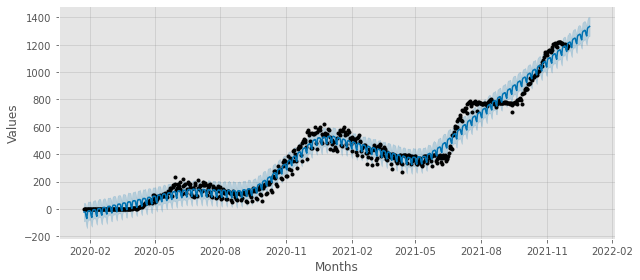

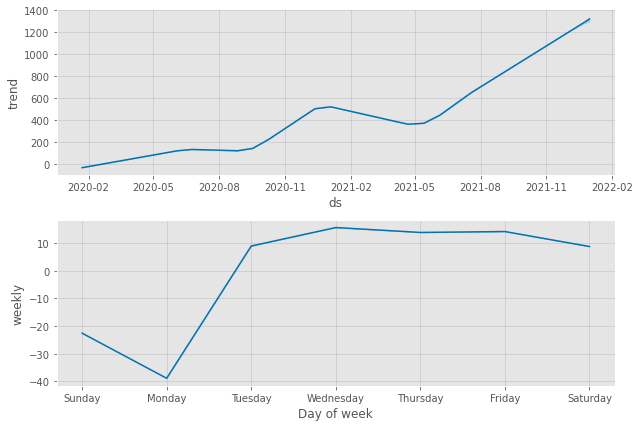

In [23]:
#Create FBProphet Model and visualize the model output for Russian deaths

class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Months",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(RUS_deaths)])

model2 = Fbprophet()
model2.fit(RUS_deaths)
model2.forecast(30,"D")
model2.plot()

In [25]:
#Evaluate performance of the FBProphet model on Russian COVID-19 deaths prediction
model2.R2()

0.9750849880228369